In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score





In [5]:
df = pd.read_csv('..\Dataset\heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
print("Shape: ", df.shape)
print("Datatypes: ", df.dtypes)
print("Null values: \n", df.isnull().sum())


Shape:  (303, 14)
Datatypes:  age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
Null values: 
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [7]:
print("Unique Values Per Feature: \n", df.nunique())


Unique Values Per Feature: 
 age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


From this we know:

    There are 303 Datapoints

    13 Features:
        5 Numerical Features, 8 Categorical Features
        
    0 Null Values
    1 Categorical Output Variable

Features are:

Age: integer | Numerical

Sex: integer | Categorical (2)

Chest Pain Type (cp): integer | Categorical (4)

Resting Blood Pressure(trtbps): integer | Numerical

Cholesterol(chol): integer | Numerical

Fasting Blood Sugar > 120(fbs):integer | Categorical (2)

Resting ECG results(restecg): integer   | Categorical (3) 

Maximum heart rate achieved(thalachh): integer | Numerical

Exercise Induced Angina(exng): Integer | Categorical (2)

Previous Peak(oldpeak): Float | Numerical

Slope of ST segment(slp): integer | Categorical(3)

Number of Major Vessels(caa): integer | Categorical(5)

thall: integer | Categorical(4)


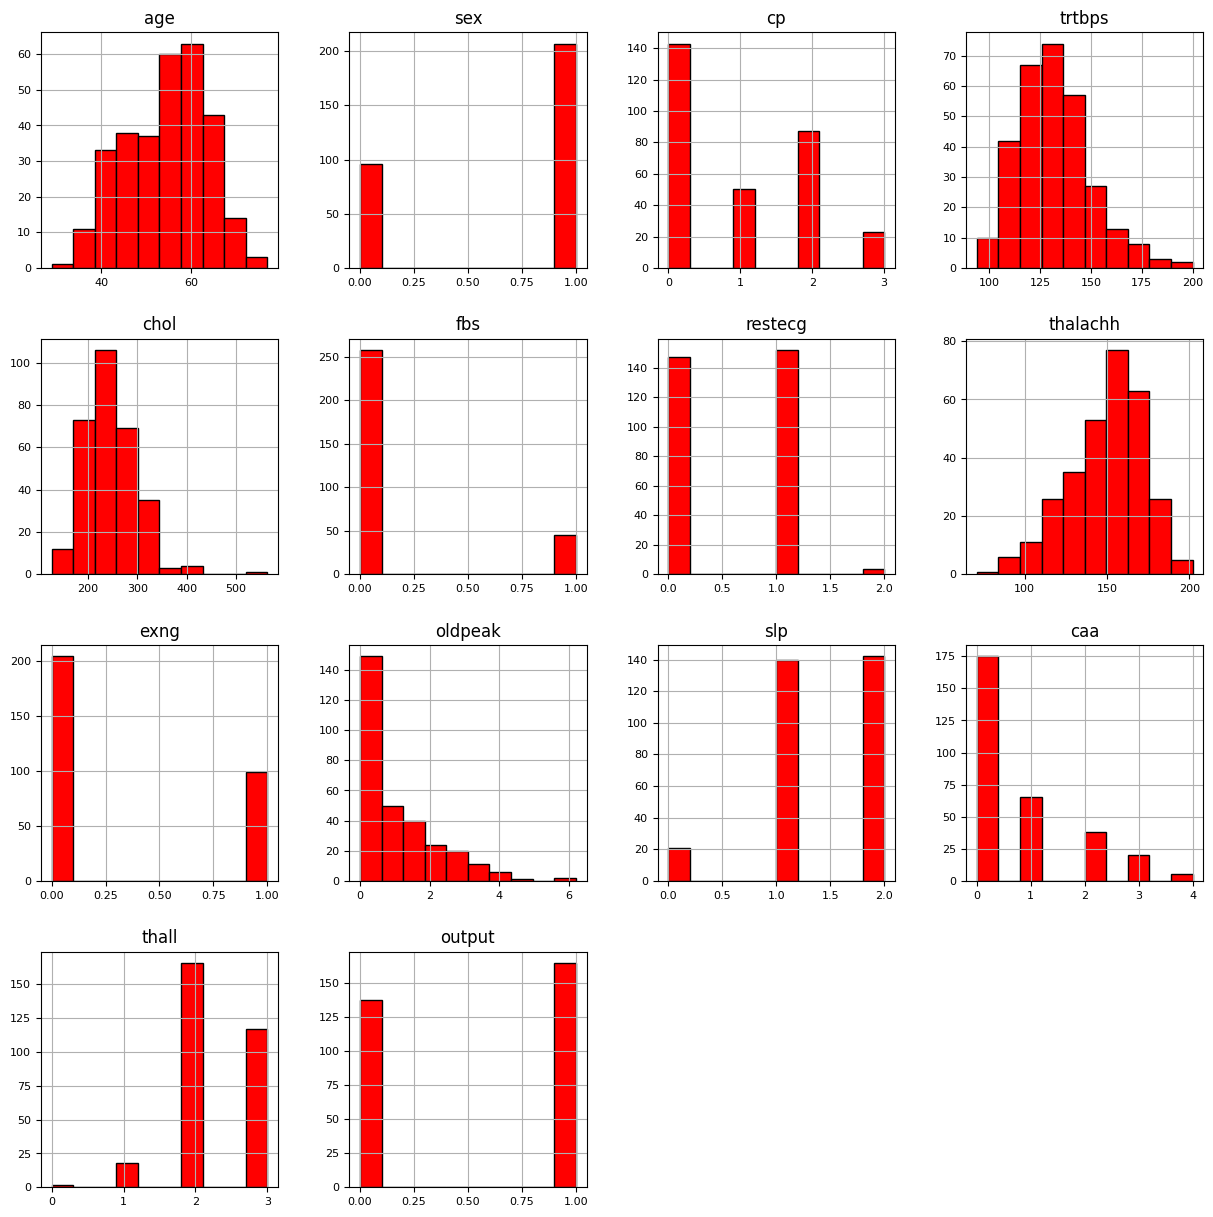

In [6]:
df.hist(figsize=(15,15), edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, color='red')
plt.show()


<Axes: title={'center': 'Correlation Matrix'}>

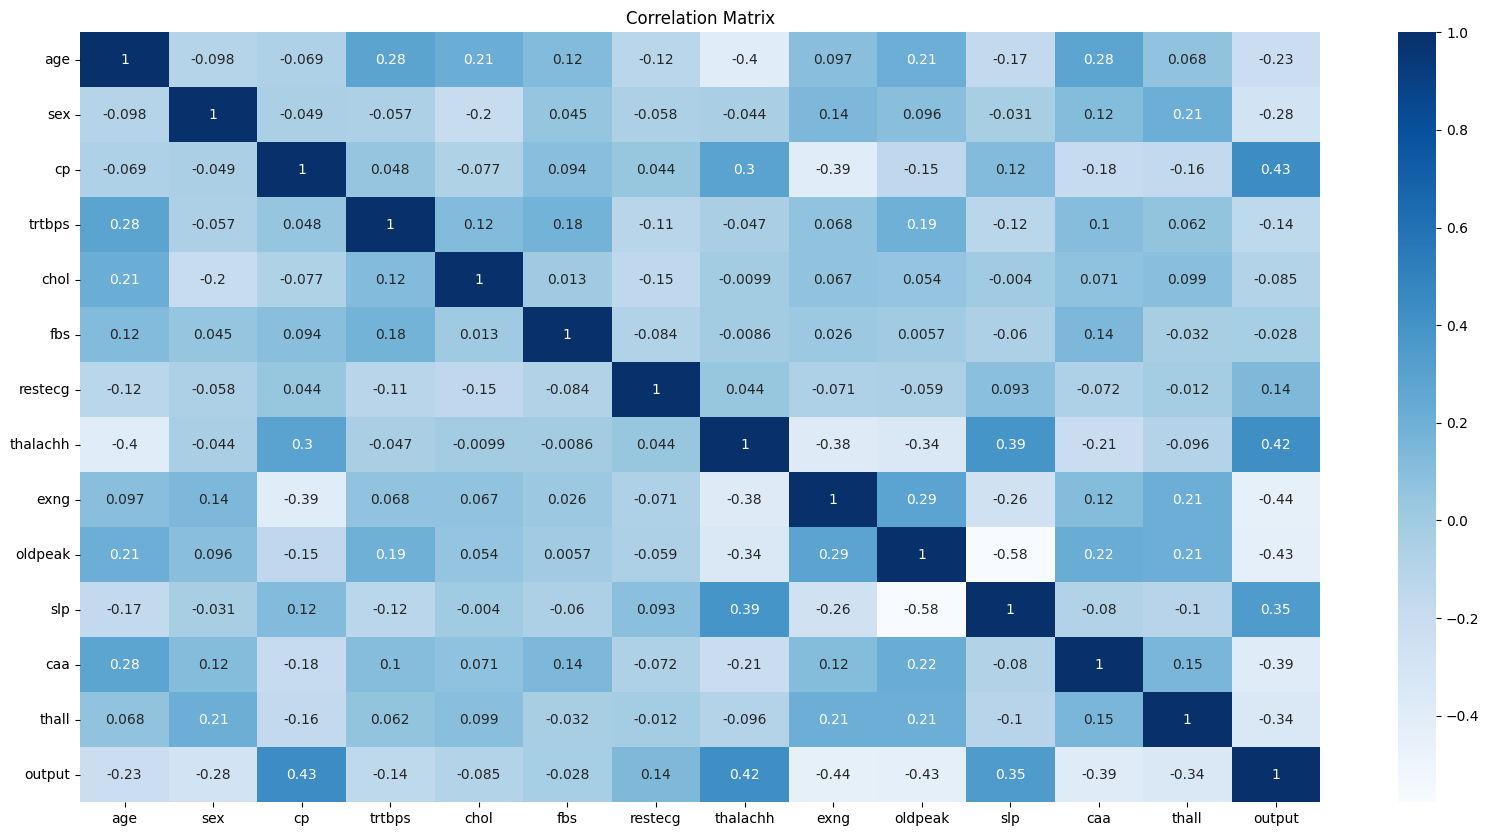

In [7]:
#Correlation Matrix to find least correlated variables for Feature Selection
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), cmap="Blues", annot=True)

In [8]:
#Correlation of each feature with the target variable

df.corr().iloc[:,-1].abs().sort_values(ascending=False)

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64

([<matplotlib.axis.XTick at 0x16936c7aa90>,
 [Text(0, 0, 'Typical Angina'),
  Text(1, 0, 'Atypical Angina'),
  Text(2, 0, 'Non-Anginal Pain'),
  Text(3, 0, 'Asymptomatic')])

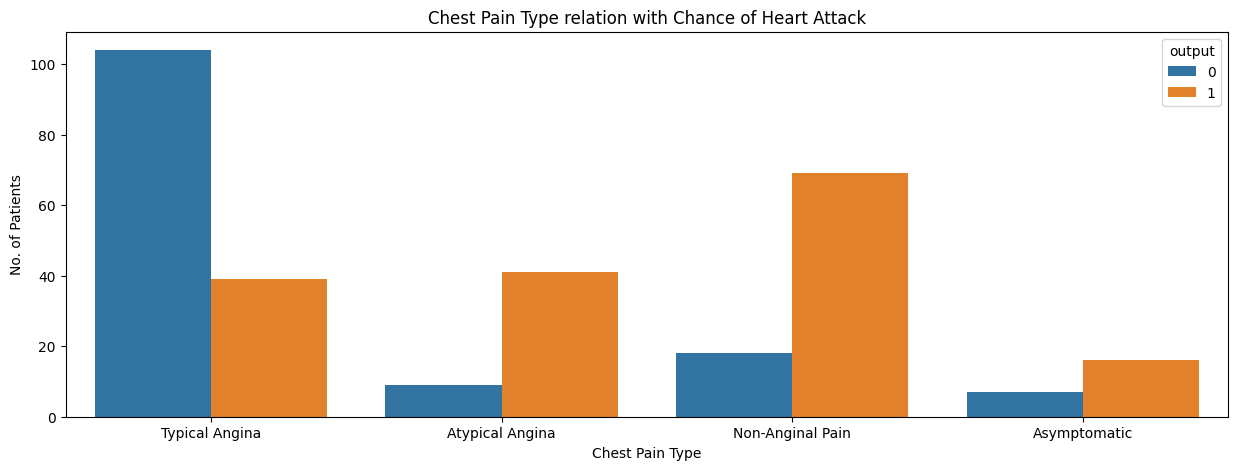

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cp', hue='output')
plt.title('Chest Pain Type relation with Chance of Heart Attack')
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Patients')
plt.xticks(ticks=[0,1,2,3],labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])

([<matplotlib.axis.XTick at 0x169363714c0>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

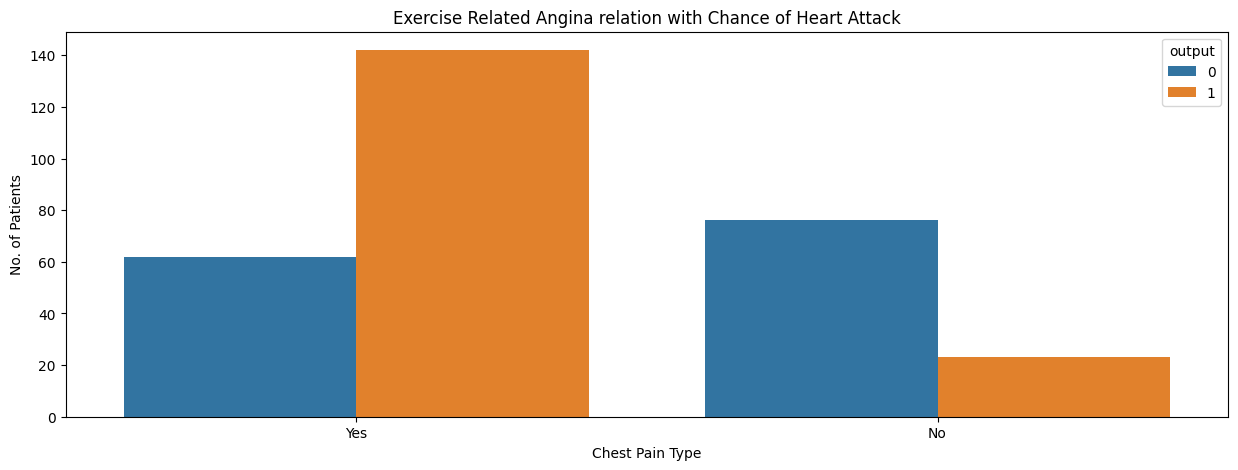

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='exng', hue='output')
plt.title('Exercise Related Angina relation with Chance of Heart Attack')
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Patients')
plt.xticks(ticks=[0,1],labels=['Yes','No'])

Splitting, Cleaning and Standardizing the data

Cleaning: Duplicate Values Removed 

Feature Selection: Least Correlated Variables with output dropped since they will have least effect on the models

Standardizing: Numerical Data is Standardized, Categorical Data is One-Hot Encoded. Standardization (z = (X - mean) / Standard Deviation) is done so that high magnitude data does not disproportionately affect models such as KNN

Splitting: Data is split into Train and Test Set with Ratio: 8:2

X = Input Features | Y = Output Variable


                

In [7]:
#Cleaning the data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

#Splitting Numerical and Categorical Variables
numerical_variables = ["age" , "trtbps" , "chol" , "thalachh" , "oldpeak"]
categorical_variables = ["sex" , "cp", "exng" , "slp" , "caa" ,  "thall"]
dropped_variables = ["restecg" , "fbs"]

#Scaling and Encoding
scaler = StandardScaler()
df[numerical_variables] = scaler.fit_transform(df[numerical_variables])

encoder = OneHotEncoder()
encoded_variables = encoder.fit_transform(df[categorical_variables])
encoded_df = pd.DataFrame(encoded_variables.toarray(), columns=encoder.get_feature_names_out(categorical_variables))

# Drop original categorical columns from df
df.drop(columns=categorical_variables, inplace=True)
df.drop(columns=dropped_variables, inplace=True)
# Concatenate original df with encoded_df
df = pd.concat([df, encoded_df], axis=1)

In [8]:
df.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
X = df.drop(columns=['output'])
Y = df['output']

In [10]:
print(X.shape)
print(Y.shape)
print(X.isna().sum())
print(Y.isna().sum())

(303, 25)
(303,)
age         1
trtbps      1
chol        1
thalachh    1
oldpeak     1
sex_0       1
sex_1       1
cp_0        1
cp_1        1
cp_2        1
cp_3        1
exng_0      1
exng_1      1
slp_0       1
slp_1       1
slp_2       1
caa_0       1
caa_1       1
caa_2       1
caa_3       1
caa_4       1
thall_0     1
thall_1     1
thall_2     1
thall_3     1
dtype: int64
1


In [13]:
X.fillna(X.mean(), inplace=True)
Y.fillna(Y.mean(), inplace=True)
print(X.shape)
print(Y.shape)

(303, 25)
(303,)


In [14]:
#Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (242, 25)
X_test shape:  (61, 25)
Y_train shape:  (242,)
Y_test shape:  (61,)


In [15]:
#Converting Continuous Float Values to Int 

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

Model Training:

3 Classification Models are used: 

    1. Logistic Regression: Learning Rate  = [0.001, 0.01, 0.1, 1, 10, 100] | Iterations = 1000
    
    2. K-Nearest Neighbors: K = 1-20 , Selecting the Best Performing K

    3. Random Forest

In [18]:
#Logistic Regression

learning_rates = [0.001, 0.01, 0.1, 1, 10, 100]
LogisticRegressionModel = LogisticRegression(C=learning_rates, max_iter=1000)

LR_accuracy_scores = []
LR_precision_scores = []
LR_recall_scores = []
LR_roc_auc_scores = []

for learning_rate in learning_rates:
    logistic_regression_model = LogisticRegression(C=learning_rate, max_iter=1000)
    logistic_regression_model.fit(X_train, Y_train)
    y_pred = logistic_regression_model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, logistic_regression_model.predict_proba(X_test)[:,-1])
    
    LR_accuracy_scores.append(accuracy)
    LR_precision_scores.append(precision)
    LR_recall_scores.append(recall)
    LR_roc_auc_scores.append(roc_auc)


lr_scores = pd.DataFrame({'Learning Rate': learning_rates,
                              'Accuracy': LR_accuracy_scores,
                              'Precision': LR_precision_scores,
                              'Recall': LR_recall_scores,
                              'ROC-AUC': LR_roc_auc_scores})

lr_scores


,Learning Rate,Accuracy,Precision,Recall,ROC-AUC
0,0.001,0.475410,0.466667,1.0,0.956710
1,0.010,0.803279,0.700000,1.0,0.955628
2,0.100,0.852459,0.756757,1.0,0.971861
3,1.000,0.868852,0.777778,1.0,0.970779
4,10.000,0.836066,0.736842,1.0,0.970779
5,100.000,0.852459,0.756757,1.0,0.972944


Gradient Descent Was performed to find best value of LR, which is 1 as visible in graph as well as table.

Along with Accuracy, Precision and ROC-AUC, recall was also used as a metric as it is critical we do not have false negatives, i.e predicting low risk on a datapoint incorrectly,
as our dataset is predicting on medical data, and false negatives predictions can be dangerous for the patient as they are at risk for heart disease, but are under the impression that theyre safe.


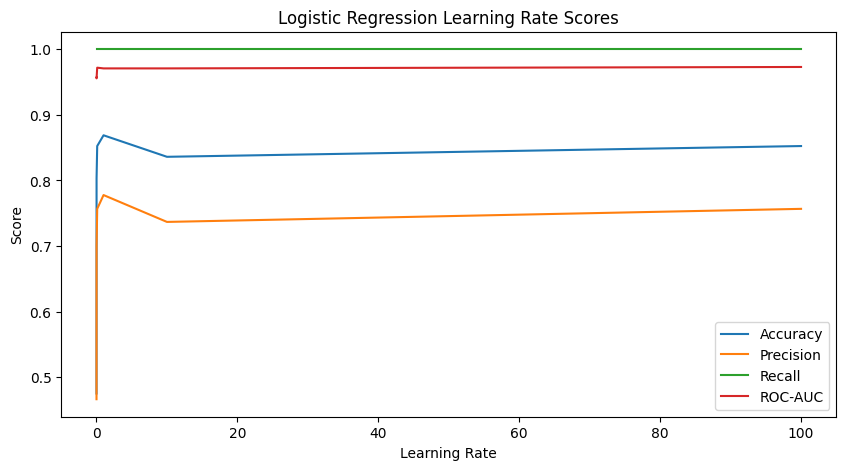

In [26]:
lr = [0.001, 0.01, 0.1, 1, 10,100]
plt.figure(figsize=(10,5))
plt.plot(lr, LR_accuracy_scores, label='Accuracy')
plt.plot(lr, LR_precision_scores, label='Precision')
plt.plot(lr, LR_recall_scores, label='Recall')
plt.plot(lr, LR_roc_auc_scores, label='ROC-AUC')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Logistic Regression Learning Rate Scores')
plt.legend()
plt.show()


In [22]:
# Logistic Regression Model Evaluation
Bestlogistic_regression_accuracy = np.argmax(LR_accuracy_scores)
Bestlogistic_regression_precision = np.argmax(LR_precision_scores)
Bestlogistic_regression_recall = np.argmax(LR_recall_scores)
Bestlogistic_regression_roc_auc = np.argmax(LR_roc_auc_scores)

print(Bestlogistic_regression_accuracy)
print(Bestlogistic_regression_precision)
print(Bestlogistic_regression_recall)
print(Bestlogistic_regression_roc_auc)
print("\nBest Logistic Regression Model for Learning Rate:")
print("Accuracy:", learning_rates[Bestlogistic_regression_accuracy])
print("Precision:", learning_rates[Bestlogistic_regression_precision])
print("Recall:", learning_rates[Bestlogistic_regression_recall])
print("ROC-AUC:", learning_rates[Bestlogistic_regression_roc_auc])

3
3
0
5

Best Logistic Regression Model for Learning Rate:
Accuracy: 1
Precision: 1
Recall: 0.001
ROC-AUC: 100


So, Best Learning Rate for Logistic Regression is 1

In [28]:
#K-Nearest Neighbors
knn_accuracy_scores = []
knn_precision_scores = []
knn_recall_scores = []
knn_roc_auc_scores = []
k_values = range(1, 21)

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    y_pred = knn_model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, knn_model.predict_proba(X_test)[:, 1])
    
    knn_accuracy_scores.append(accuracy)
    knn_precision_scores.append(precision)
    knn_recall_scores.append(recall)
    knn_roc_auc_scores.append(roc_auc)

knn_scores = pd.DataFrame({'K': k_values,
                               'Accuracy': knn_accuracy_scores,
                               'Precision': knn_precision_scores,
                               'Recall': knn_recall_scores,
                               'ROC-AUC': knn_roc_auc_scores})

knn_scores




,K,Accuracy,Precision,Recall,ROC-AUC
0,1,0.836066,0.764706,0.928571,0.843074
1,2,0.836066,0.781250,0.892857,0.853896
2,3,0.852459,0.771429,0.964286,0.916667
3,4,0.868852,0.812500,0.928571,0.905844
4,5,0.836066,0.736842,1.000000,0.906385
5,6,0.868852,0.794118,0.964286,0.919913
6,7,0.819672,0.729730,0.964286,0.909091
7,8,0.852459,0.787879,0.928571,0.912879
8,9,0.852459,0.771429,0.964286,0.918831
9,10,0.836066,0.764706,0.928571,0.920996


In [29]:
best_k_accuracy = k_values[np.argmax(knn_accuracy_scores)]
best_k_precision = k_values[np.argmax(knn_precision_scores)]
best_k_recall = k_values[np.argmax(knn_recall_scores)]
best_k_roc_auc = k_values[np.argmax(knn_roc_auc_scores)]

print("Best performing value of K (Accuracy):", best_k_accuracy)
print("Best performing value of K (Precision):", best_k_precision)
print("Best performing value of K (Recall):", best_k_recall)
print("Best performing value of K (ROC-AUC):", best_k_roc_auc)


Best performing value of K (Accuracy): 4
Best performing value of K (Precision): 4
Best performing value of K (Recall): 5
Best performing value of K (ROC-AUC): 20


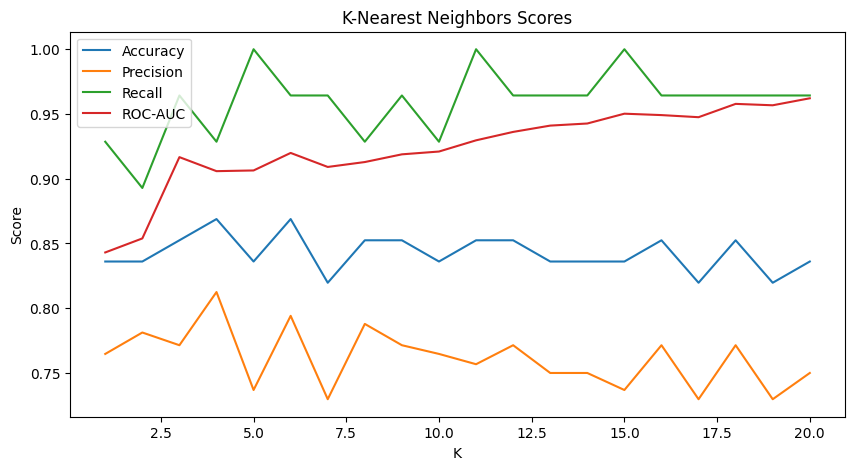

In [30]:
plt.figure(figsize=(10,5))
plt.plot(k_values, knn_accuracy_scores, label='Accuracy')
plt.plot(k_values, knn_precision_scores, label='Precision')
plt.plot(k_values, knn_recall_scores, label='Recall')
plt.plot(k_values, knn_roc_auc_scores, label='ROC-AUC')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('K-Nearest Neighbors Scores')
plt.legend()
plt.show()


In [25]:
#Random Forest Classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)
y_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test, y_pred)
random_forest_precision = precision_score(Y_test, y_pred)
random_forest_recall = recall_score(Y_test, y_pred)
random_forest_roc_auc = roc_auc_score(Y_test, random_forest_model.predict_proba(X_test)[:, 1])

print("\nRandom Forest Classifier:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("ROC-AUC:", random_forest_roc_auc)



Random Forest Classifier:
Accuracy: 0.8688524590163934
Precision: 0.7941176470588235
Recall: 0.9642857142857143
ROC-AUC: 0.9437229437229436


In [26]:
#Accuracy
accuracy_scores = [LR_accuracy_scores[3], knn_accuracy_scores[3], knn_accuracy_scores[4], random_forest_accuracy]
#Precision
precision_scores = [LR_precision_scores[3], knn_precision_scores[3], knn_precision_scores[4], random_forest_precision]
#Recall
recall_scores = [LR_recall_scores[3], knn_recall_scores[3], knn_recall_scores[4], random_forest_recall]
#ROC-AUC
roc_auc_scores = [LR_roc_auc_scores[3], knn_roc_auc_scores[3],knn_roc_auc_scores[4], random_forest_roc_auc]

#Create a DataFrame to display the scores
model_scores = pd.DataFrame({'Model': ['Logistic Regression (LR=1)', 'K-Nearest Neighbors (K=4)','K-Nearest Neighbors(K=5)', 'Random Forest'],
                             'Accuracy': accuracy_scores,
                             'Precision': precision_scores,
                             'Recall': recall_scores,
                             'ROC-AUC': roc_auc_scores})

model_scores


,Model,Accuracy,Precision,Recall,ROC-AUC
0,Logistic Regression (LR=1),0.868852,0.777778,1.000000,0.970779
1,K-Nearest Neighbors (K=4),0.868852,0.812500,0.928571,0.905844
2,K-Nearest Neighbors(K=5),0.836066,0.736842,1.000000,0.906385
3,Random Forest,0.868852,0.794118,0.964286,0.943723


Optimization:

For Logistic Regression

Varied Learning Rates were tested to find the optimum Value

For Random Forest:

Initially GridSearchCV was used with a large variety of parameters (16000~ Combinations) in an attempt to brute force and find the best parameters. However, After 35 Minutes of Compilation time, this attempt was largely unsuccessful

In an attempt for a more efficient algorithm, RandomziedGridSearchCV was used.
Dictionary of parameters used here was identical to GridSearchCV, but number of iterations is set to 500. 
However, best parameters from RandomizedSearchCV still performed worse than the original algorithm with the default parameters. So, we can assume default parameters provide a well optimized model

Another interesting point is that there is no major difference between the 4 different versions run, despite having varying hyperparameters.
Only slight changes occur when value of 'bootstrap' parameter is changed. However this is not statistically significant since the difference is caused by the reduced no. of samples used to build each tree (i.e using bootstrap samples of the dataset)

For K-Nearest Neighbors:

The best value of K was found by  trying all values between 1-20. 

The data was also standardized which improves the performance since KNN is sensitive to the scale of the features. Unstandardized data would result in features with large magnitude disproportiately affecting the algorithm and creating a bias 


In [27]:
#Random Forest Optimized using GridSearchCV

# random_forest_model_opt = RandomForestClassifier()
# parameters = {'n_estimators': np.arange(10, 200, 20),
#             'max_depth': np.arange(1, 10, 1),
#             'min_samples_split': np.arange(2, 10, 1),
#             'min_samples_leaf': np.arange(1, 5, 1),
#             'max_features': ['sqrt', 'log2'],
#             'criterion': ['gini', 'entropy']}

# random_forest_gridsearch = GridSearchCV(random_forest_model_opt, param_grid=parameters)
# random_forest_gridsearch.fit(X_train, Y_train)




In [28]:
#Random Forest Optimized using RandomizedSearchCV 

random_forest_model_opt = RandomForestClassifier()
parameters = {'n_estimators': np.arange(10, 200, 20),
              'max_depth': np.arange(1, 10, 1),
              'min_samples_split': np.arange(2, 10, 1),
              'min_samples_leaf': np.arange(1, 5, 1),
              'max_features': ['sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}

random_forest_randomizedsearch = RandomizedSearchCV(random_forest_model_opt, param_distributions=parameters, n_iter=500)
random_forest_randomizedsearch.fit(X_train, Y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])})

In [29]:
print("Best Parameters: ", random_forest_randomizedsearch.best_params_)

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'gini'}


In [30]:
random_forest_optimized = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=8, criterion='gini')
random_forest_optimized.fit(X_train, Y_train)

y_pred = random_forest_optimized.predict(X_test)

rf_opt_accuracy = accuracy_score(Y_test, y_pred)
rf_opt_precision = precision_score(Y_test, y_pred)
rf_opt_recall = recall_score(Y_test, y_pred)
rf_opt_rocauc = roc_auc_score(Y_test, random_forest_optimized.predict_proba(X_test)[:, 1])

print("\nRandom Forest Optimized:")
print("Accuracy:", rf_opt_accuracy)
print("Precision:", rf_opt_precision)
print("Recall:", rf_opt_recall)
print("ROC-AUC:", rf_opt_rocauc)


model_scores = model_scores.append({'Model': 'Random Forest RandomizedSearchCV',
                                    'Accuracy': rf_opt_accuracy,
                                    'Precision': rf_opt_precision,
                                    'Recall': rf_opt_recall,
                                    'ROC-AUC': rf_opt_rocauc}, ignore_index=True)


Random Forest Optimized:
Accuracy: 0.8524590163934426
Precision: 0.7878787878787878
Recall: 0.9285714285714286
ROC-AUC: 0.9642857142857142


C:\Users\tarus\AppData\Local\Temp\ipykernel_41032\3519246806.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'Random Forest RandomizedSearchCV',


In [31]:
random_forest_optimized_2 =RandomForestClassifier(n_estimators=200,criterion="entropy",max_features="log2",bootstrap=True)
random_forest_optimized_2.fit(X_train, Y_train)

y_pred = random_forest_optimized_2.predict(X_test)

In [32]:
rf_opt_accuracy = accuracy_score(Y_test, y_pred)
rf_opt_precision = precision_score(Y_test, y_pred)
rf_opt_recall = recall_score(Y_test, y_pred)
rf_opt_rocauc = roc_auc_score(Y_test, random_forest_optimized_2.predict_proba(X_test)[:, 1])

print("\nRandom Forest Optimized Bootstrapped:")
print("Accuracy:", rf_opt_accuracy)
print("Precision:", rf_opt_precision)
print("Recall:", rf_opt_recall)
print("ROC-AUC:", rf_opt_rocauc)

model_scores = model_scores.append({'Model': 'Random Forest Optimized Bootstrapped',
                                    'Accuracy': rf_opt_accuracy,
                                    'Precision': rf_opt_precision,
                                    'Recall': rf_opt_recall,
                                    'ROC-AUC': rf_opt_rocauc}, ignore_index=True)






Random Forest Optimized Bootstrapped:
Accuracy: 0.8524590163934426
Precision: 0.7714285714285715
Recall: 0.9642857142857143
ROC-AUC: 0.9567099567099567


C:\Users\tarus\AppData\Local\Temp\ipykernel_41032\447713296.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'Random Forest Optimized Bootstrapped',


In [33]:
model_scores

,Model,Accuracy,Precision,Recall,ROC-AUC
0,Logistic Regression (LR=1),0.868852,0.777778,1.000000,0.970779
1,K-Nearest Neighbors (K=4),0.868852,0.812500,0.928571,0.905844
2,K-Nearest Neighbors(K=5),0.836066,0.736842,1.000000,0.906385
3,Random Forest,0.868852,0.794118,0.964286,0.943723
4,Random Forest RandomizedSearchCV,0.852459,0.787879,0.928571,0.964286
5,Random Forest Optimized Bootstrapped,0.852459,0.771429,0.964286,0.956710


<Axes: title={'center': 'Feature Importance'}, xlabel='Feature', ylabel='Importance'>

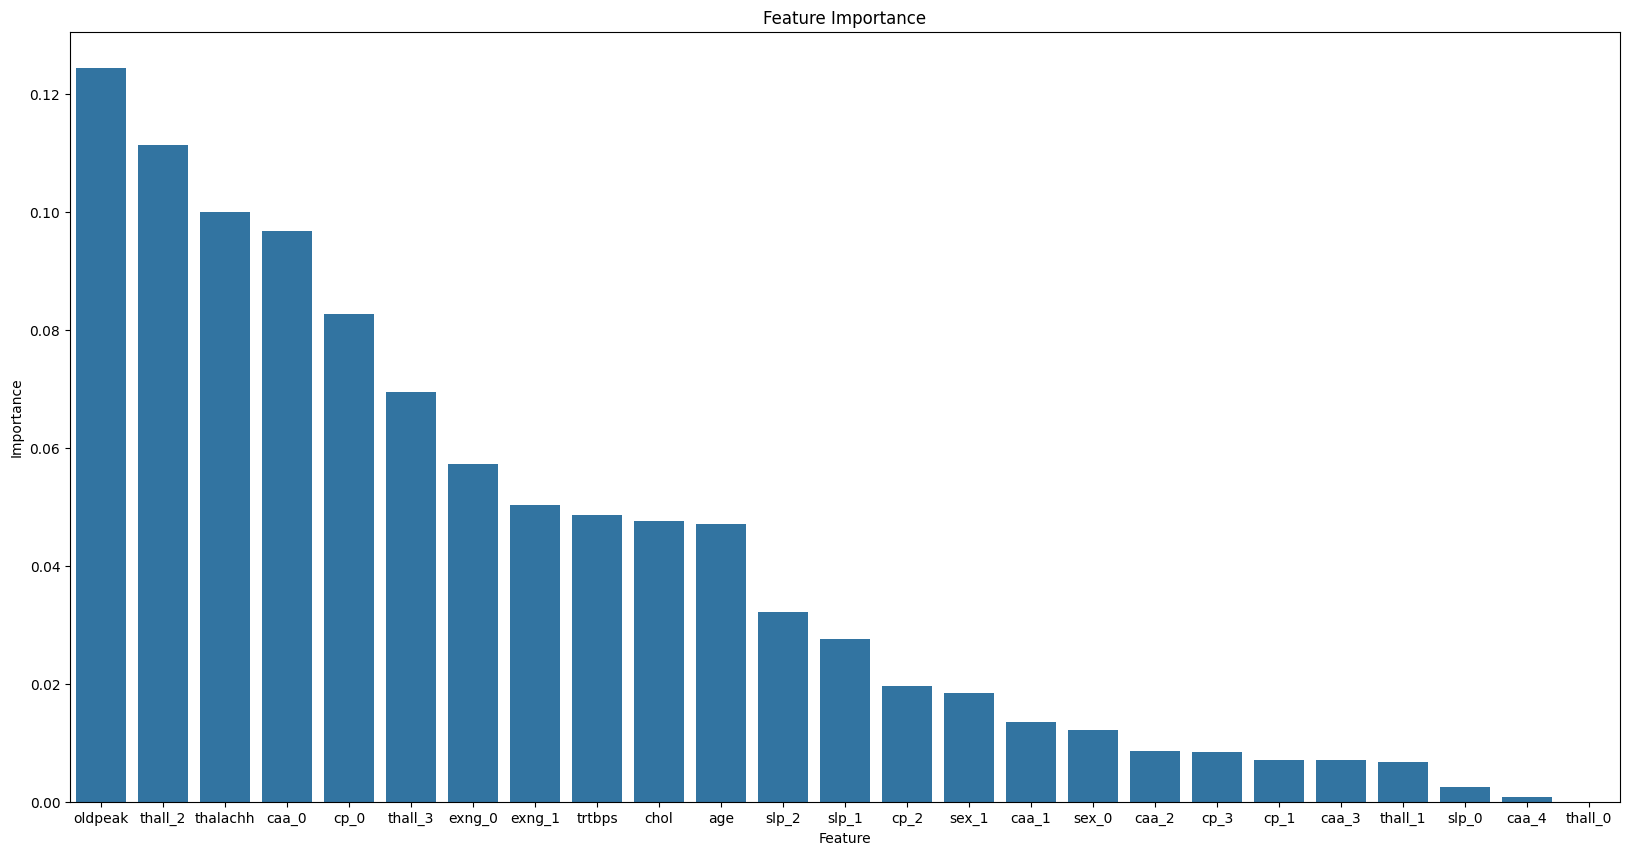

In [34]:
#Feature Importance for Random Forest
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': random_forest_optimized.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(20, 10))
plt.title('Feature Importance')
sns.barplot(x='Feature', y='Importance', data=feature_importance)
